In [2]:
train_dir = 'Covid19-dataset/train'
test_dir = 'Covid19-dataset/test'

In [3]:
from keras.preprocessing.image import ImageDataGenerator

c:\users\b.mehdi\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\b.mehdi\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\b.mehdi\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             validation_split=0.2)
train_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size = (70,70), shuffle = True, subset='training')
validation_data = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size = (70,70), subset='validation')

Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(test_dir, batch_size=32, target_size = (70,70))

Found 66 images belonging to 3 classes.


In [19]:
from keras import models, layers, optimizers

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(70, 70, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-4), metrics=['acc'])

In [27]:
history = model.fit(train_data, epochs = 50, validation_data=validation_data)

Epoch 1/50
7/7 [==============================] - 5s 700ms/step - loss: 1.0995 - acc: 0.2935 - val_loss: 1.0872 - val_acc: 0.4600
Epoch 2/50
7/7 [==============================] - 4s 538ms/step - loss: 1.0786 - acc: 0.4577 - val_loss: 1.0696 - val_acc: 0.4400
Epoch 3/50
7/7 [==============================] - 4s 589ms/step - loss: 1.0623 - acc: 0.4428 - val_loss: 1.0596 - val_acc: 0.4400
Epoch 4/50
7/7 [==============================] - 4s 628ms/step - loss: 1.0492 - acc: 0.4527 - val_loss: 1.0503 - val_acc: 0.4400
Epoch 5/50
7/7 [==============================] - 4s 565ms/step - loss: 1.0288 - acc: 0.4876 - val_loss: 1.0308 - val_acc: 0.4800
Epoch 6/50
7/7 [==============================] - 4s 586ms/step - loss: 1.0059 - acc: 0.5970 - val_loss: 1.0123 - val_acc: 0.5800
Epoch 7/50
7/7 [==============================] - 4s 532ms/step - loss: 0.9823 - acc: 0.5721 - val_loss: 0.9753 - val_acc: 0.6200
Epoch 8/50
7/7 [==============================] - 4s 538ms/step - loss: 0.9785 - acc: 0.67

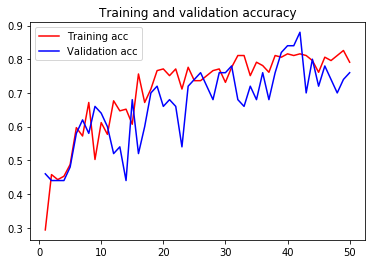

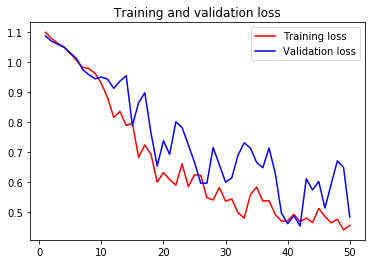

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
model.evaluate(test_data)

3/3 [==============================] - 1s 379ms/step - loss: 0.2684 - acc: 0.9242


[0.26836860179901123, 0.9242424368858337]